In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import openpyxl

In [22]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [184]:
## read csv file, format columns, remove unnecessary column
df = pd.read_csv('TestData_v2.csv')
df.columns = df.columns.str.replace(' ', '')
df.drop(['Unnamed:0'], axis=1, inplace=True)
# df.PatientID = df.PatientID.astype('int')

In [ ]:
df.PatientID = df.PatientID.astype('int')

In [185]:
## drop rows with all Nan values
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [186]:
##convert categorical variables into string or category codes - str or int 
## all object dtypes into str
df.Label = df.Label.astype('category')
# df['LabelID'] = df.Label.cat.codes

In [187]:
cat_columns = ['FourKHz', 'OneKHz', 'UrineProtein', 'UrineSugar', 'Urobilinogen', 'OccultBlood', 'Ketones', 'HBAntigen',
               'TPHA', 'HCVAntibody']

for col in cat_columns:
    df[col] = df[col].astype('category')    
#     print(col, dict(enumerate(df[col].cat.categories)))
#     df[col] = df[col].cat.codes
    
#     df[str(col)] = pd.Categorical(df[str(col)])
#     df[str(col)] = df[str(col)].cat.codes
    
#     key_map = dict(enumerate(df[col].cat.categories))
#     key_map.update({0: 'zero', 1: 'one'})
#     print(key_map)
#     df.replace({col: key_map}, inplace=True)
#     df['mycol_codes'] = df['mycol'].cat.codes
#     df['mycol_reversed'] = df['mycol_codes'].map(d)

In [188]:
## calculate or update BMI
# df['BMI'] = df['Weight'] / ((df['Height']/100) * (df['Height']/100))
df['BMI'] = df.apply(
    lambda row: row['Weight']/((row['Height']/100)*(row['Height']/100)) if np.isnan(row['BMI']) else row['BMI'],
    axis=1
)

# df['Height'] = df.apply(
#     lambda row: row['Height']*row['Weight'] if np.isnan(row['BMI']) else row['BMI'],
#     axis=1
# )

In [204]:
df.groupby('Label').describe()

Height                                                                \
          count        mean       std    min      25%     50%      75%    max   
Label                                                                           
Accepted   99.0  169.282828  8.882051  119.0  166.500  170.00  173.100  190.0   
Denied     32.0  169.362500  7.773352  157.2  161.875  170.00  175.025  183.6   
Pending    22.0  171.331818  9.271995  148.6  164.500  171.55  178.175  184.9   
Referred   38.0  168.892105  7.782877  153.4  163.125  168.00  175.075  187.5   

         Weight                                                               \
          count       mean        std   min     25%    50%       75%     max   
Label                                                                          
Accepted   99.0  70.705354  45.404214  22.0  57.800  64.00  72.30000  480.00   
Denied     24.0  83.179792  67.457047  22.0  54.625  65.85  85.12875  373.00   
Pending    23.0  68.447826  24.281509  20.0  58.300  66.80  88.85000  110.50   
Referred   42.0  76.381024  44.335378  25.0  55.950  66.00  83.60000  311.53   

            BMI                                                           \
          count       mean       std        min        25%   50%     75%   
Label                                                                      
Accepted  115.0  23.813621  5.908577   8.928571  21.500000  22.6  24.950   
Denied     41.0  23.825852  5.398528  17.200000  20.100000  22.5  26.000   
Pending    23.0  26.659397  8.294281  17.400000  21.782272  24.7  29.250   
Referred   52.0  26.824710  8.860885  16.000000  22.375985  24.9  28.025   

                    AbdominalCircumference                              \
                max                  count       mean        std   min   
Label                                                                    
Accepted  57.803468                   69.0  83.168261  16.503291  39.0   
Denied    39.843750                   19.0  87.021053  17.492684  35.3   
Pending   57.000000                   15.0  81.486667  14.743854  35.0   
Referred  58.000000                   24.0  83.562500  14.848915  45.4   

                                      VitalCapacity                           \
             25%   50%     75%    max         count      mean       std  min   
Label                                                                          
Accepted  81.000  84.9  85.000  185.0          19.0  2.731053  1.622782  1.0   
Denied    83.450  85.0  91.500  130.0          17.0  2.967059  2.063067  1.0   
Pending   82.500  84.9  85.000  103.8           6.0  2.966667  1.544884  1.0   
Referred  78.125  84.9  86.725  118.0          15.0  3.996000  2.381931  1.0   

                                  BloodPressureSecond                        \
           25%   50%    75%   max               count       mean        std   
Label                                                                         
Accepted  1.00  3.00  4.120  5.15                48.0  79.368750  17.298237   
Denied    1.00  2.64  4.280  7.00                11.0  73.454545   8.201995   
Pending   2.00  2.75  4.100  5.00                11.0  77.454545  18.581516   
Referred  2.76  4.00  4.025  8.00                21.0  73.571429  18.500193   

                                          BloodPressureFirst              ...  \
           min    25%   50%    75%    max              count        mean  ...   
Label                                                                     ...   
Accepted  31.7  69.75  80.0  84.25  147.0               59.0  113.374576  ...   
Denied    57.0  69.50  76.0  79.50   84.0               18.0  108.911111  ...   
Pending   28.0  75.50  84.0  84.50  102.0               11.0  118.909091  ...   
Referred  21.0  68.00  72.0  84.00  110.0               28.0  109.035714  ...   

         bodyFatPercentage         Lym                                     \
                       75%   max count       mean        std   min  

In [177]:
df.describe()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID
count,191.000000,188.000000,169.000000,127.000000,57.000000,91.000000,116.000000,133.000000,91.000000,195.000000,208.000000,199.000000,138.000000,159.000000,158.000000,159.000000,401.000000,103.000000,321.000000,360.000000,91.000000,143.000000,139.000000,59.000000,229.000000,95.000000,281.000000,207.000000,248.000000,76.000000,56.000000,61.000000,165.000000,69.000000,130.000000,145.000000,85.000000,59.000000,77.000000,51.000000,93.000000,108.000000,94.000000,9.970000e+02
mean,169.454450,73.289617,24.951006,83.620551,3.159123,77.084615,112.159483,5.385602,6003.021978,437.353846,13.080865,43.772362,92.300725,31.862453,32.899873,27.563711,22.121653,12.098447,24.928956,37.244112,185.705604,210.420280,1.111168,13.705085,0.878421,76.951684,65.876584,116.811594,114.972738,6.941316,1.666964,67.704918,4.717455,0.154797,5.523846,99.162759,98.524706,20.091695,24.645455,3.056863,2.026882,1.069843,2.186170,4.018053e+06
std,8.505043,46.492055,6.897452,16.046830,1.989713,16.895245,29.162597,2.156957,2791.484862,169.228763,4.338348,6.029684,16.551911,9.172809,6.441854,15.700692,15.599028,19.920741,15.762314,31.149123,59.873190,75.310282,0.866502,5.573318,0.358824,14.230130,30.962630,74.589767,38.810800,1.187812,0.708955,26.647291,2.798277,0.159749,1.264905,30.477681,25.262375,8.998808,14.492244,2.241183,2.277114,0.691358,2.867939,1.521438e+04
min,119.000000,20.000000,13.500000,35.000000,1.000000,21.000000,33.000000,1.100000,100.000000,52.000000,4.700000,26.400000,21.000000,12.000000,11.100000,10.400000,1.000000,1.000000,3.000000,1.000000,31.000000,21.000000,0.200000,3.000000,0.020000,50.300000,21.000000,23.000000,37.000000,3.000000,0.550000,11.000000,1.000000,0.010000,1.990000,30.000000,28.000000,3.000000,8.100000,1.000000,0.100000,0.005000,0.100000,3.956543e+06
25%,164.600000,57.375000,21.500000,81.000000,1.000000,69.000000,100.750000,4.000000,4845.000000,435.000000,11.425000,40.200000,87.550000,29.000000,31.525000,19.050000,10.000000,4.000000,13.000000,15.000000,157.500000,160.000000,0.615000,10.000000,0.700000,66.450000,45.000000,60.500000,86.750000,6.700000,1.075000,49.000000,1.000000,0.040000,5.000000,86.000000,87.600000,14.950000,11.000000,1.000000,0.900000,0.619750,0.700000,4.012759e+06
50%,169.800000,64.950000,24.100000,84.900000,3.500000,80.000000,121.000000,5.000000,6100.000000,479.000000,13.800000,44.400000,91.000000,31.100000,33.000000,24.600000,21.000000,4.400000,21.000000,28.500000,177.000000,206.000000,1.000000,13.700000,0.830000,77.000000,57.000000,101.000000,116.500000,7.100000,1.600000,64.000000,5.400000,0.100000,5.400000,93.000000,96.000000,20.800000,20.600000,2.500000,1.000000,1.000000,1.000000,4.015578e+06
75%,174.600000,75.050000,26.000000,85.255000,4.220000,84.000000,130.000000,6.000000,7235.000000,521.500000,15.200000,46.600000,95.000000,32.850000,34.000000,30.150000,30.000000,4.900000,31.000000,50.000000,208.500000,262.500000,1.100000,17.000000,1.000000,86.350000,75.000000,151.000000,135.000000,7.425000,1.892500,79.000000,6.600000,0.210000,5.800000,102.000000,102.000000,26.400000,36.100000,4.000000,2.000000,1.047500,1.875000,4.032453e+06
max,190.000000,480.000000,58.000000,185.000000,8.000000,147.000000,174.000000,15.000000,18370.000000,1422.000000,33.900000,81.000000,219.000000,101.000000,94.000000,85.000000,97.000000,96.000000,80.000000,149.000000,559.000000,397.000000,5.000000,32.100000,3.000000,111.110000,193.000000,389.000000,254.000000,11.000000,4.000000,134.000000,15.500000,0.700000,10.000000,336.000000,184.000000,53.000000,71.000000,11.000000,13.000000,3.000000,12.000000,4.037800e+06


In [190]:
accepted = df[df['Label'] == 'Accepted']
denied = df[df['Label'] == 'Denied']
pending = df[df['Label'] == 'Pending']
referred = df[df['Label'] == 'Referred']

In [192]:
accepted.describe()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID
count,99.000000,99.000000,115.000000,69.000000,19.000000,48.000000,59.000000,52.000000,49.000000,86.000000,96.000000,95.00000,52.000000,59.000000,55.000000,70.000000,168.000000,38.000000,125.000000,145.000000,31.000000,61.000000,55.000000,33.000000,95.000000,34.000000,130.000000,100.000000,108.000000,34.000000,20.000000,22.000000,79.000000,24.000000,53.000000,67.000000,34.000000,36.000000,29.000000,23.000000,51.000000,34.000000,51.000000,4.580000e+02
mean,169.282828,70.705354,23.813621,83.168261,2.731053,79.368750,113.374576,5.181635,6043.183673,457.244186,13.584896,44.31200,93.100000,30.962712,33.518182,28.733000,20.367756,11.802632,23.794480,35.289154,172.874516,219.672131,1.063475,14.893939,0.887789,78.006176,65.527923,105.455000,111.786296,6.739118,1.494000,69.545455,4.973165,0.144167,5.405849,94.171642,100.058824,21.550278,23.603448,3.139130,1.984314,1.251382,1.733333,4.018137e+06
std,8.882051,45.404214,5.908577,16.503291,1.622782,17.298237,27.682103,2.146239,2289.372910,172.065236,3.967447,5.77996,21.098704,1.974658,5.287970,14.637965,13.012972,19.268817,15.270821,30.393297,36.845599,73.328421,0.865345,5.245709,0.340766,13.115132,30.739426,65.351621,33.936629,1.259231,0.459363,24.786185,2.617015,0.153353,0.869618,19.638504,23.769016,9.199738,13.665898,2.147459,2.219132,0.826867,2.242558,1.600162e+04
min,119.000000,22.000000,8.928571,39.000000,1.000000,31.700000,33.000000,1.100000,320.000000,52.000000,5.150000,35.00000,21.000000,26.900000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,24.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,0.010000,2.000000,63.000000,70.000000,5.000000,9.000000,1.000000,0.200000,0.005000,0.100000,3.956543e+06
25%,166.500000,57.800000,21.500000,81.000000,1.000000,69.750000,102.500000,4.000000,5000.000000,437.000000,12.850000,40.95000,88.750000,29.900000,32.300000,21.700000,9.000000,4.000000,11.000000,15.000000,158.000000,164.000000,0.680000,11.400000,0.750000,71.475000,45.250000,54.000000,90.332500,6.700000,1.000000,50.000000,3.000000,0.039000,5.100000,86.000000,87.250000,15.575000,11.000000,1.000000,0.850000,0.810000,0.750000,4.012100e+06
50%,170.000000,64.000000,22.600000,84.900000,3.000000,80.000000,123.000000,5.000000,6100.000000,482.500000,14.450000,44.00000,92.000000,31.100000,33.100000,25.150000,20.500000,4.400000,20.000000,28.000000,173.000000,207.000000,0.850000,14.400000,0.870000,80.050000,57.500000,84.000000,116.000000,7.150000,1.600000,68.500000,5.750000,0.100000,5.400000,91.000000,92.000000,21.000000,15.400000,3.000000,1.000000,1.000000,1.000000,4.015656e+06
75%,173.100000,72.300000,24.950000,85.000000,4.120000,84.250000,130.000000,6.000000,7400.000000,514.250000,15.225000,46.20000,94.525000,32.100000,34.000000,30.750000,30.000000,4.975000,30.000000,50.000000,184.055000,274.000000,1.000000,17.100000,1.000000,86.600000,75.350000,147.500000,130.000000,7.300000,1.740000,78.750000,6.450000,0.162500,5.700000,99.000000,104.250000,26.975000,33.100000,4.500000,1.750000,1.287500,1.350000,4.032715e+06
max,190.000000,480.000000,57.803468,185.000000,5.150000,147.000000,170.000000,14.000000,10170.000000,1422.000000,30.000000,81.00000,219.000000,35.000000,54.000000,82.000000,61.000000,71.000000,76.000000,147.000000,252.000000,382.000000,5.000000,32.100000,3.000000,111.110000,193.000000,317.000000,208.000000,7.900000,2.300000,124.000000,12.000000,0.654000,7.600000,201.500000,183.000000,53.000000,51.900000,8.400000,9.000000,3.000000,12.000000,4.037169e+06


In [193]:
accepted.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
0,168.1,NaN,NaN,73.90,one,one,NaN,NaN,NaN,NaN,one,one,one,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,17.00,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,Accepted
1,172.1,65.7,22.000000,85.00,one,one,NaN,NaN,144.0,NaN,NaN,zero,one,NaN,NaN,7500.0,482.0,13.00,45.5,94.0,30.7,32.5,28.3,12.00,NaN,12.00,21.0,172.0,268.0,0.30,9.9,0.87,NaN,83.00,54.0,130.0,7.90,NaN,49.0,4.6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,Accepted
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,Accepted
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,Accepted
5,174.8,74.3,24.316774,86.00,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,7100.0,560.0,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,Accepted
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,Accepted
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978282.0,Accepted
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978288.0,Accepted
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978292.0,Accepted
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,27.0,6.00,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978309.0,Accepted


In [197]:
test = df[df['BMI'] != round(df['Weight']/((df['Height']/100)*(df['Height']/100)),2)]

In [199]:
test.describe()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID
count,189.000000,186.000000,229.000000,126.000000,57.000000,90.000000,116.000000,132.000000,90.000000,195.000000,207.000000,198.000000,138.000000,158.000000,158.000000,159.000000,400.000000,102.000000,320.000000,358.000000,91.000000,142.000000,138.000000,59.000000,228.000000,95.000000,280.000000,206.000000,247.000000,76.000000,56.000000,61.000000,165.000000,69.000000,130.000000,144.000000,84.000000,59.000000,76.000000,51.000000,92.000000,108.000000,93.000000,9.950000e+02
mean,169.408995,73.145957,24.743133,83.569921,3.159123,76.996667,112.159483,5.390038,6007.944444,437.353846,13.081256,43.750505,92.300725,31.886899,32.899873,27.563711,22.101957,12.187647,24.953422,37.058325,185.705604,210.402113,1.116322,13.705085,0.877493,76.951684,65.947571,116.752427,114.786393,6.941316,1.666964,67.704918,4.717455,0.154797,5.523846,99.275000,98.709524,20.091695,24.825000,3.056863,2.038043,1.069843,2.134409,4.018044e+06
std,8.537581,46.706114,6.962531,16.100702,1.989713,16.968937,29.162597,2.164565,2806.726364,169.228763,4.348861,6.037060,16.551911,9.196779,6.441854,15.700692,15.613570,19.998433,15.780895,31.022780,59.873190,75.576553,0.867518,5.573318,0.359338,14.230130,30.995153,74.766602,38.778275,1.187812,0.708955,26.647291,2.798277,0.159749,1.264905,30.553973,25.356226,8.998808,14.502075,2.241183,2.287032,0.691358,2.838995,1.522443e+04
min,119.000000,20.000000,8.928571,35.000000,1.000000,21.000000,33.000000,1.100000,100.000000,52.000000,4.700000,26.400000,21.000000,12.000000,11.100000,10.400000,1.000000,1.000000,3.000000,1.000000,31.000000,21.000000,0.200000,3.000000,0.020000,50.300000,21.000000,23.000000,37.000000,3.000000,0.550000,11.000000,1.000000,0.010000,1.990000,30.000000,28.000000,3.000000,8.100000,1.000000,0.100000,0.005000,0.100000,3.956543e+06
25%,164.500000,57.125000,21.366276,81.000000,1.000000,69.000000,100.750000,4.000000,4822.500000,435.000000,11.350000,40.200000,87.550000,29.050000,31.525000,19.050000,10.000000,4.000000,13.000000,15.000000,157.500000,159.500000,0.632500,10.000000,0.700000,66.450000,45.000000,60.250000,86.500000,6.700000,1.075000,49.000000,1.000000,0.040000,5.000000,86.750000,87.900000,14.950000,11.000000,1.000000,0.900000,0.619750,0.700000,4.012748e+06
50%,169.800000,64.650000,23.457858,84.900000,3.500000,79.500000,121.000000,5.000000,6100.000000,479.000000,13.800000,44.250000,91.000000,31.100000,33.000000,24.600000,21.000000,4.400000,21.000000,28.000000,177.000000,205.050000,1.000000,13.700000,0.830000,77.000000,57.000000,100.000000,116.000000,7.100000,1.600000,64.000000,5.400000,0.100000,5.400000,93.500000,96.000000,20.800000,20.750000,2.500000,1.000000,1.000000,1.000000,4.015578e+06
75%,174.500000,74.525000,25.700000,85.007500,4.220000,84.000000,130.000000,6.000000,7257.500000,521.500000,15.200000,46.585000,95.000000,32.875000,34.000000,30.150000,30.000000,4.900000,31.125000,50.000000,208.500000,263.250000,1.100000,17.000000,1.000000,86.350000,75.200000,151.500000,134.500000,7.425000,1.892500,79.000000,6.600000,0.210000,5.800000,102.025000,102.250000,26.400000,36.275000,4.000000,2.000000,1.047500,1.500000,4.032455e+06
max,190.000000,480.000000,58.000000,185.000000,8.000000,147.000000,174.000000,15.000000,18370.000000,1422.000000,33.900000,81.000000,219.000000,101.000000,94.000000,85.000000,97.000000,96.000000,80.000000,149.000000,559.000000,397.000000,5.000000,32.100000,3.000000,111.110000,193.000000,389.000000,254.000000,11.000000,4.000000,134.000000,15.500000,0.700000,10.000000,336.000000,184.000000,53.000000,71.000000,11.000000,13.000000,3.000000,12.000000,4.037800e+06


In [198]:
test.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
0,168.1,NaN,NaN,73.9,one,one,NaN,NaN,NaN,NaN,one,one,one,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,17.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,Accepted
1,172.1,65.7,22.000000,85.0,one,one,NaN,NaN,144.0,NaN,NaN,zero,one,NaN,NaN,7500.0,482.0,13.0,45.5,94.0,30.70,32.5,28.30,12.0,NaN,12.0,21.0,172.0,268.0,0.3,9.9,0.87,NaN,83.00,54.0,130.0,7.9,NaN,49.0,4.6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,Accepted
2,171.9,58.2,19.695691,NaN,one,zero,1.00,80.0,132.0,NaN,NaN,one,one,NaN,4.0,6000.0,NaN,NaN,NaN,83.0,14.00,31.6,13.00,14.0,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,NaN,3965780.0,Referred
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,Accepted
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,Accepted
5,174.8,74.3,24.316774,86.0,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,7100.0,560.0,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,Accepted
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,Accepted
7,NaN,NaN,23.000000,80.4,one,zero,4.59,NaN,NaN,one,NaN,zero,one,NaN,5.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,22.40,30.0,NaN,28.0,2.0,190.0,NaN,NaN,NaN,NaN,63.1,47.00,NaN,173.0,NaN,NaN,56.0,7.9,one,one,NaN,one,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978258.0,Denied
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978262.0,Referred
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978264.0,Referred


In [201]:
## height in cm
## weight in kg
h = 175.9
w = 68.1
bmi = w / ((h/100)*(h/100))
print(bmi)

22.009766389438408


In [ ]:
bmi = 25.0
h = 

In [183]:
df.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
0,168.1,NaN,NaN,73.9,one,one,NaN,NaN,NaN,NaN,one,one,one,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,17.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,Accepted
1,172.1,65.7,22.00,85.0,one,one,NaN,NaN,144.0,NaN,NaN,zero,one,NaN,NaN,7500.0,482.0,13.0,45.5,94.0,30.70,32.5,28.30,12.0,NaN,12.0,21.0,172.0,268.0,0.3,9.9,0.87,NaN,83.00,54.0,130.0,7.9,NaN,49.0,4.6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,Accepted
2,171.9,58.2,10004.58,NaN,one,zero,1.00,80.0,132.0,NaN,NaN,one,one,NaN,4.0,6000.0,NaN,NaN,NaN,83.0,14.00,31.6,13.00,14.0,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,NaN,3965780.0,Referred
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,Accepted
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,Accepted
5,174.8,74.3,12987.64,86.0,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,7100.0,560.0,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,Accepted
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,Accepted
7,NaN,NaN,23.00,80.4,one,zero,4.59,NaN,NaN,one,NaN,zero,one,NaN,5.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,22.40,30.0,NaN,28.0,2.0,190.0,NaN,NaN,NaN,NaN,63.1,47.00,NaN,173.0,NaN,NaN,56.0,7.9,one,one,NaN,one,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978258.0,Denied
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978262.0,Referred
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978264.0,Referred


ValueError: array must not contain infs or NaNs

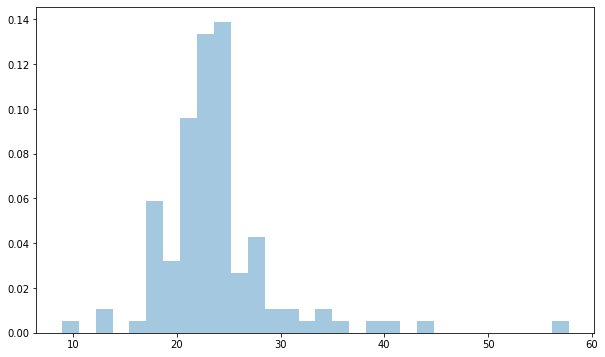

In [191]:
plt.figure(figsize=(10,6))
sns.distplot(accepted.BMI, bins =30)